#  Author : Veerendra R V

## *Data Science and Business Analytics Internship at Sparks Foundation*

## Prediction using Supervised Machine Learning

In this section we will see how the python scikit-learn library for machine learning can be used to implement regression functions. 

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a Simple Linear Regression Task as it takes only two variables.

In [1]:
## Import Standard Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Read the Dataset

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [3]:
## Top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
## Bottom 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
## Shape of data
df.shape

(25, 2)

In [6]:
## Column names
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
## Statistics of data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
## Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
## Checking the null values

df.isna().sum()

Hours     0
Scores    0
dtype: int64

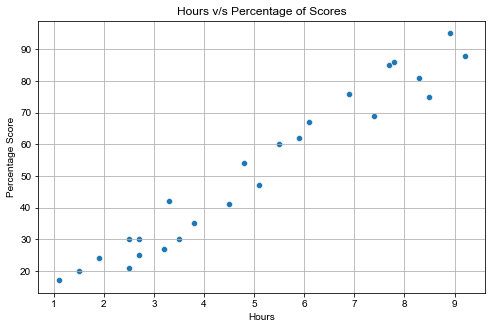

In [10]:
## Plotting the distribution of scores
plt.figure(figsize=(8,5))
sns.scatterplot(y="Scores",x="Hours",data = df)
plt.title("Hours v/s Percentage of Scores")
plt.ylabel("Percentage Score")
plt.xlabel("Hours")
plt.grid(True,linestyle='-')
sns.set_style('darkgrid')
plt.show()

**From the graph above we can clearly see that there is a positive
linear relationship between the number of hours studied and percentage of score**

In [11]:
## Divide the data into "Attributes"(Inputs) and "Labels"(Outputs)

x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this dataset into training and testing data. we will do this by using Scikit-Learn's built-in function train_test_split().

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=12) 

# Trainig the Algorithm 

we have splitted our data into training and testing sets, and now is finally the time to train our algoritm

In [13]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 


LinearRegression()

In [14]:
print(model.intercept_)

2.639905784194255


In [15]:
print(model.coef_)

[9.77483126]


#  Plotting the Regression Line

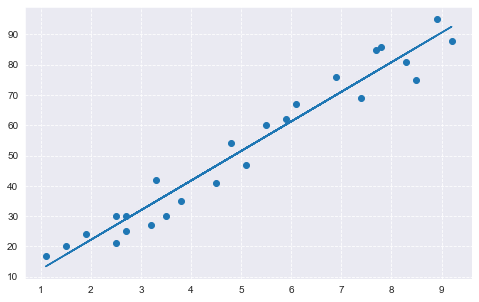

In [16]:
line = model.coef_*x+model.intercept_

## Plotting for the test data
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(x, line)
plt.grid(True,linestyle='--')
sns.set_style('darkgrid')
plt.show()

#  Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
## Predicting the Scores
y_pred=model.predict(x_test)
print(y_pred)

[74.97365707 56.40147769 62.26637644 52.49154519 89.63590396 83.7710052
 36.85181518 13.39222016]


In [18]:
# Comparing Actual Vs Predictions

data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,69,74.973657
1,60,56.401478
2,67,62.266376
3,47,52.491545
4,95,89.635904
5,81,83.771005
6,30,36.851815
7,17,13.392220


In [19]:
## You can also test with your own data

hours = 9.25
own_pred=model.predict(np.array(hours).reshape(1, 1))

print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.057094895472


# 93.05 is the predicted score if a student studies for 9.25hrs/day.

# Test the model on the testing data

In [20]:
model.score(x_test,y_test)

0.9578604019720702

#  Evaluating the model
The final step is to evaluate the model performance of algorithm. This step is particlatly important to compare how well different algorithms perform on a particular dataset.

For Simplicity here, i have choosen the R-Squared and Mean Absolute Error. There are many such metrices.



# To test the model - We use r2

Calculating r2 is the first step in determining how good the model will be 

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error

In [22]:
print('r2 Score for the perfect model is:', r2_score(y_test,y_pred))

r2 Score for the perfect model is: 0.9578604019720702


In [23]:
print('Mean_Absolute_Error Score for the model is:', mean_absolute_error(y_test,y_pred))

Mean_Absolute_Error Score for the model is: 4.79900554865473


#  THANK YOU